In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
import pandas as pd

In [2]:
data_encoded = pickle.load( open( "../data/data_encodings.p", "rb" ) )

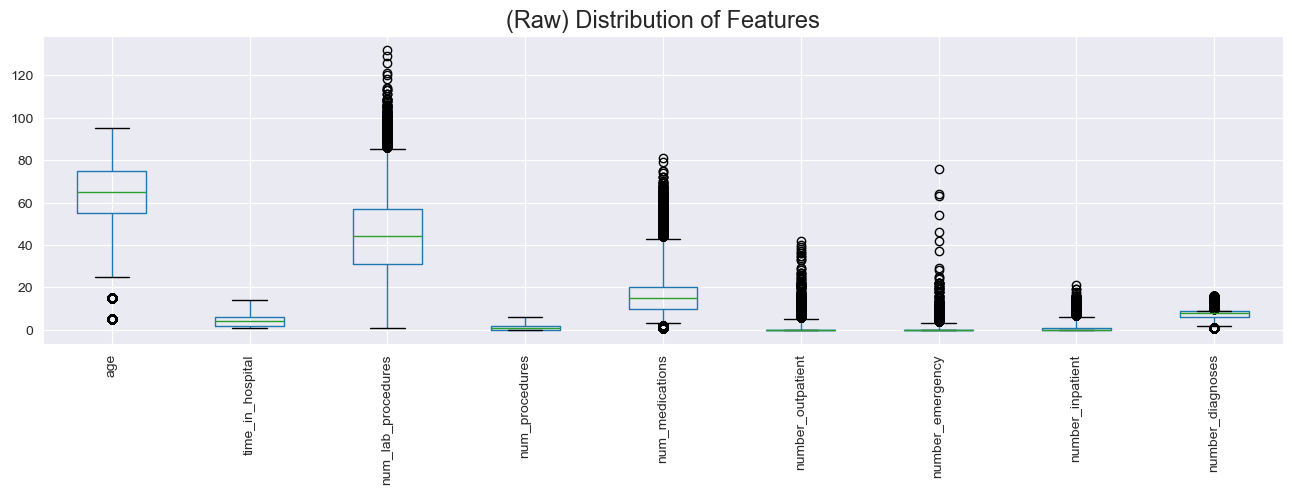

In [3]:
plt.figure(figsize=(16,4))
data_encoded.copy().drop('patient_nbr', axis=1).loc[:,'age':'number_diagnoses'].boxplot(whis=(1,99))
plt.title('(Raw) Distribution of Features', fontsize=17)
plt.xticks(rotation=90)
plt.show()

In [4]:
for key in data_encoded.keys():
    data_encoded[key] = data_encoded[key][(np.abs(stats.zscore(data_encoded[key])) < 3)]
data_encoded.head()


,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,discharge_disposition_id_grouped_EndOfLife,discharge_disposition_id_grouped_HomeDischarge,discharge_disposition_id_grouped_HomeWFollowUp,discharge_disposition_id_grouped_InstitutionalCare,discharge_disposition_id_grouped_Unknown,admission_source_grouped_Births,admission_source_grouped_Data_Issues,admission_source_grouped_Emergency_or_Law,admission_source_grouped_Referrals,admission_source_grouped_Transfers
0,8222157.0,NaN,1.0,41.0,0,1.0,0.0,0.0,0.0,NaN,...,0.0,0,0,0,NaN,0.0,0.0,0,1,0.0
1,55629189.0,NaN,3.0,59.0,0,18.0,0.0,0.0,0.0,9.0,...,0.0,1,0,0,0.0,0.0,0.0,1,0,0.0
2,86047875.0,25.0,2.0,11.0,5,13.0,2.0,0.0,1.0,6.0,...,0.0,1,0,0,0.0,0.0,0.0,1,0,0.0
3,82442376.0,35.0,2.0,44.0,1,16.0,0.0,0.0,0.0,7.0,...,0.0,1,0,0,0.0,0.0,0.0,1,0,0.0
4,42519267.0,45.0,1.0,51.0,0,8.0,0.0,0.0,0.0,5.0,...,0.0,1,0,0,0.0,0.0,0.0,1,0,0.0


In [5]:
data_scaled = data_encoded.copy()
scaler = MinMaxScaler()
data_scaled[data_encoded.columns] = scaler.fit_transform(data_encoded)
data_scaled.head()

,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,discharge_disposition_id_grouped_EndOfLife,discharge_disposition_id_grouped_HomeDischarge,discharge_disposition_id_grouped_HomeWFollowUp,discharge_disposition_id_grouped_InstitutionalCare,discharge_disposition_id_grouped_Unknown,admission_source_grouped_Births,admission_source_grouped_Data_Issues,admission_source_grouped_Emergency_or_Law,admission_source_grouped_Referrals,admission_source_grouped_Transfers
0,0.048273,NaN,0.000000,0.396040,0.000000,0.000000,0.0,0.0,0.00,NaN,...,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0
1,0.326608,NaN,0.166667,0.574257,0.000000,0.435897,0.0,0.0,0.00,0.636364,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.505202,0.000000,0.083333,0.099010,0.833333,0.307692,0.5,0.0,0.25,0.363636,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.484033,0.142857,0.083333,0.425743,0.166667,0.384615,0.0,0.0,0.00,0.454545,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.249638,0.285714,0.000000,0.495050,0.000000,0.179487,0.0,0.0,0.00,0.272727,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
"""
nan = np.nan
X = data_scaled
imputer = KNNImputer(n_neighbors=1, weights="uniform")
imputer.fit_transform(X)
"""

'\nnan = np.nan\nX = data_scaled\nimputer = KNNImputer(n_neighbors=1, weights="uniform")\nimputer.fit_transform(X)\n'

In [7]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X = data_scaled
imp.fit_transform(X)

array([[0.04827299, 0.59161832, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.32660833, 0.59161832, 0.16666667, ..., 1.        , 0.        ,
        0.        ],
       [0.50520199, 0.        , 0.08333333, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.24123899, 0.71428571, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.18607853, 0.85714286, 0.75      , ..., 1.        , 0.        ,
        0.        ],
       [0.31274054, 0.71428571, 0.41666667, ..., 1.        , 0.        ,
        0.        ]])